## Binance Data Preparation

In [1]:
import requests
import pandas as pd
from datetime import datetime
import configparser
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager
import pandas as pd
import numpy as np

Use the API keys assigned by Binance to access the API 

In [2]:
config_data=configparser.ConfigParser()
config_data.read("config.ini")
keys=config_data['keys']
client=Client(keys['apiKey'],keys['secretKey']) #create binance api client
print('logged in')

logged in


The following code uses the Binance API to fetch all ticker prices for all symbols.
Ticker definition: In finance and investing, a ticker symbol (often simply called a "ticker") is a unique series of letters assigned to a publicly traded company, mutual fund, or other financial asset that trades on a stock exchange.

In [3]:
tickers=client.get_all_tickers()
tickers

[{'symbol': 'ETHBTC', 'price': '0.06798000'},
 {'symbol': 'LTCBTC', 'price': '0.00336800'},
 {'symbol': 'BNBBTC', 'price': '0.01147400'},
 {'symbol': 'NEOBTC', 'price': '0.00037050'},
 {'symbol': 'QTUMETH', 'price': '0.00144700'},
 {'symbol': 'EOSETH', 'price': '0.00046680'},
 {'symbol': 'SNTETH', 'price': '0.00001297'},
 {'symbol': 'BNTETH', 'price': '0.00022330'},
 {'symbol': 'BCCBTC', 'price': '0.07908100'},
 {'symbol': 'GASBTC', 'price': '0.00010360'},
 {'symbol': 'BNBETH', 'price': '0.16890000'},
 {'symbol': 'BTCUSDT', 'price': '27302.47000000'},
 {'symbol': 'ETHUSDT', 'price': '1855.66000000'},
 {'symbol': 'HSRBTC', 'price': '0.00041400'},
 {'symbol': 'OAXETH', 'price': '0.00017780'},
 {'symbol': 'DNTETH', 'price': '0.00002801'},
 {'symbol': 'MCOETH', 'price': '0.00577200'},
 {'symbol': 'ICNETH', 'price': '0.00166300'},
 {'symbol': 'MCOBTC', 'price': '0.00021140'},
 {'symbol': 'WTCBTC', 'price': '0.00000630'},
 {'symbol': 'WTCETH', 'price': '0.00023700'},
 {'symbol': 'LRCBTC', 'p

In [4]:
ticker_df=pd.DataFrame(tickers)
ticker_df

,symbol,price
0,ETHBTC,0.06798000
1,LTCBTC,0.00336800
2,BNBBTC,0.01147400
3,NEOBTC,0.00037050
4,QTUMETH,0.00144700
...,...,...
2217,OGTRY,133.80000000
2218,PEPETRY,0.00003262
2219,WBETHETH,1.00140000
2220,ASTUSDT,0.14680000


In [5]:
ticker_df.set_index('symbol',inplace=True)

In [6]:
ticker_df

,price
symbol,
ETHBTC,0.06798000
LTCBTC,0.00336800
BNBBTC,0.01147400
NEOBTC,0.00037050
QTUMETH,0.00144700
...,...
OGTRY,133.80000000
PEPETRY,0.00003262
WBETHETH,1.00140000


only for insights 

In financial charting, a candlestick is a visual representation of the price movement of an asset over a specific time period. Each candlestick represents a single unit of time (e.g. a minute, an hour, a day) and displays the asset's opening price, closing price, highest price (high), and lowest price (low) during that time period. 

Binance was launched in July 2017 and therefore the historical data for trading pairs listed on Binance is available from the time the exchange began operations.

In [7]:
historical = client.get_historical_klines('BTCUSDT',Client.KLINE_INTERVAL_1DAY,'27 Feb 2017')# parameters:(symbol, interval, date_from)
historical

[[1502928000000,
  '4261.48000000',
  '4485.39000000',
  '4200.74000000',
  '4285.08000000',
  '795.15037700',
  1503014399999,
  '3454770.05073206',
  3427,
  '616.24854100',
  '2678216.40060401',
  '0'],
 [1503014400000,
  '4285.08000000',
  '4371.52000000',
  '3938.77000000',
  '4108.37000000',
  '1199.88826400',
  1503100799999,
  '5086958.30617151',
  5233,
  '972.86871000',
  '4129123.31651808',
  '0'],
 [1503100800000,
  '4108.37000000',
  '4184.69000000',
  '3850.00000000',
  '4139.98000000',
  '381.30976300',
  1503187199999,
  '1549483.73542151',
  2153,
  '274.33604200',
  '1118001.87008735',
  '0'],
 [1503187200000,
  '4120.98000000',
  '4211.08000000',
  '4032.62000000',
  '4086.29000000',
  '467.08302200',
  1503273599999,
  '1930364.39032646',
  2321,
  '376.79594700',
  '1557401.33373730',
  '0'],
 [1503273600000,
  '4069.13000000',
  '4119.62000000',
  '3911.79000000',
  '4016.00000000',
  '691.74306000',
  1503359999999,
  '2797231.71402728',
  3972,
  '557.35610700',

btcusdt is the price of bitcion relative to the US dollar; 1 usdt ~ 1 dollar; usdt was chosen because its price is tied to the dollar and does not fluctuate like other cryptocurrencies

In [8]:
hist_df=pd.DataFrame(historical)
hist_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1502928000000,4261.48000000,4485.39000000,4200.74000000,4285.08000000,795.15037700,1503014399999,3454770.05073206,3427,616.24854100,2678216.40060401,0
1,1503014400000,4285.08000000,4371.52000000,3938.77000000,4108.37000000,1199.88826400,1503100799999,5086958.30617151,5233,972.86871000,4129123.31651808,0
2,1503100800000,4108.37000000,4184.69000000,3850.00000000,4139.98000000,381.30976300,1503187199999,1549483.73542151,2153,274.33604200,1118001.87008735,0
3,1503187200000,4120.98000000,4211.08000000,4032.62000000,4086.29000000,467.08302200,1503273599999,1930364.39032646,2321,376.79594700,1557401.33373730,0
4,1503273600000,4069.13000000,4119.62000000,3911.79000000,4016.00000000,691.74306000,1503359999999,2797231.71402728,3972,557.35610700,2255662.55315837,0


In [9]:
hist_df.columns=['date','open','high','low','close','volume','Close Time','Quote Asset Volume','Number of Trades','TB Base Volume','TB Quote Volume','Ignore']
hist_df.head()

,date,open,high,low,close,volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,1502928000000,4261.48000000,4485.39000000,4200.74000000,4285.08000000,795.15037700,1503014399999,3454770.05073206,3427,616.24854100,2678216.40060401,0
1,1503014400000,4285.08000000,4371.52000000,3938.77000000,4108.37000000,1199.88826400,1503100799999,5086958.30617151,5233,972.86871000,4129123.31651808,0
2,1503100800000,4108.37000000,4184.69000000,3850.00000000,4139.98000000,381.30976300,1503187199999,1549483.73542151,2153,274.33604200,1118001.87008735,0
3,1503187200000,4120.98000000,4211.08000000,4032.62000000,4086.29000000,467.08302200,1503273599999,1930364.39032646,2321,376.79594700,1557401.33373730,0
4,1503273600000,4069.13000000,4119.62000000,3911.79000000,4016.00000000,691.74306000,1503359999999,2797231.71402728,3972,557.35610700,2255662.55315837,0


In [10]:
hist_df.shape

(2106, 12)

In [11]:
hist_df.dtypes #int64 + objects (which are strings) >> preprocessing

date                   int64
open                  object
high                  object
low                   object
close                 object
volume                object
Close Time             int64
Quote Asset Volume    object
Number of Trades       int64
TB Base Volume        object
TB Quote Volume       object
Ignore                object
dtype: object

In [12]:
hist_df.head()

,date,open,high,low,close,volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,1502928000000,4261.48000000,4485.39000000,4200.74000000,4285.08000000,795.15037700,1503014399999,3454770.05073206,3427,616.24854100,2678216.40060401,0
1,1503014400000,4285.08000000,4371.52000000,3938.77000000,4108.37000000,1199.88826400,1503100799999,5086958.30617151,5233,972.86871000,4129123.31651808,0
2,1503100800000,4108.37000000,4184.69000000,3850.00000000,4139.98000000,381.30976300,1503187199999,1549483.73542151,2153,274.33604200,1118001.87008735,0
3,1503187200000,4120.98000000,4211.08000000,4032.62000000,4086.29000000,467.08302200,1503273599999,1930364.39032646,2321,376.79594700,1557401.33373730,0
4,1503273600000,4069.13000000,4119.62000000,3911.79000000,4016.00000000,691.74306000,1503359999999,2797231.71402728,3972,557.35610700,2255662.55315837,0


In [13]:
#convert from Unix timestamps to date
hist_df['date']= pd.to_datetime(hist_df['date']/1000, unit='s')
hist_df['Close Time']= pd.to_datetime(hist_df['Close Time']/1000, unit='s')
hist_df.dtypes

date                  datetime64[ns]
open                          object
high                          object
low                           object
close                         object
volume                        object
Close Time            datetime64[ns]
Quote Asset Volume            object
Number of Trades               int64
TB Base Volume                object
TB Quote Volume               object
Ignore                        object
dtype: object

In [14]:
hist_df.head() #notice open time and close time 

,date,open,high,low,close,volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,2017-08-17,4261.48000000,4485.39000000,4200.74000000,4285.08000000,795.15037700,2017-08-17 23:59:59.999000064,3454770.05073206,3427,616.24854100,2678216.40060401,0
1,2017-08-18,4285.08000000,4371.52000000,3938.77000000,4108.37000000,1199.88826400,2017-08-18 23:59:59.999000064,5086958.30617151,5233,972.86871000,4129123.31651808,0
2,2017-08-19,4108.37000000,4184.69000000,3850.00000000,4139.98000000,381.30976300,2017-08-19 23:59:59.999000064,1549483.73542151,2153,274.33604200,1118001.87008735,0
3,2017-08-20,4120.98000000,4211.08000000,4032.62000000,4086.29000000,467.08302200,2017-08-20 23:59:59.999000064,1930364.39032646,2321,376.79594700,1557401.33373730,0
4,2017-08-21,4069.13000000,4119.62000000,3911.79000000,4016.00000000,691.74306000,2017-08-21 23:59:59.999000064,2797231.71402728,3972,557.35610700,2255662.55315837,0


In [15]:
#date_series = ts_series.apply(lambda x: x.date())
hist_df.date=hist_df.date.apply(lambda x: x.date())

Ensure the entries are numeric, not strings

In [16]:
numeric_columns=['open','high','low','close','volume','Quote Asset Volume','TB Base Volume','TB Quote Volume']
hist_df[numeric_columns]=hist_df[numeric_columns].apply(pd.to_numeric,axis=1)
hist_df.head()

,date,open,high,low,close,volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,2017-08-17,4261.48,4485.39,4200.74,4285.08,795.150377,2017-08-17 23:59:59.999000064,3.454770e+06,3427,616.248541,2.678216e+06,0
1,2017-08-18,4285.08,4371.52,3938.77,4108.37,1199.888264,2017-08-18 23:59:59.999000064,5.086958e+06,5233,972.868710,4.129123e+06,0
2,2017-08-19,4108.37,4184.69,3850.00,4139.98,381.309763,2017-08-19 23:59:59.999000064,1.549484e+06,2153,274.336042,1.118002e+06,0
3,2017-08-20,4120.98,4211.08,4032.62,4086.29,467.083022,2017-08-20 23:59:59.999000064,1.930364e+06,2321,376.795947,1.557401e+06,0
4,2017-08-21,4069.13,4119.62,3911.79,4016.00,691.743060,2017-08-21 23:59:59.999000064,2.797232e+06,3972,557.356107,2.255663e+06,0


In [17]:
hist_df.dtypes

date                          object
open                         float64
high                         float64
low                          float64
close                        float64
volume                       float64
Close Time            datetime64[ns]
Quote Asset Volume           float64
Number of Trades               int64
TB Base Volume               float64
TB Quote Volume              float64
Ignore                        object
dtype: object

In [20]:
# hist_df.describe()

In [19]:
# hist_df.describe(include='object')

In [21]:
# hist_df.describe(include='datetime')

In [22]:
hist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                2106 non-null   object        
 1   open                2106 non-null   float64       
 2   high                2106 non-null   float64       
 3   low                 2106 non-null   float64       
 4   close               2106 non-null   float64       
 5   volume              2106 non-null   float64       
 6   Close Time          2106 non-null   datetime64[ns]
 7   Quote Asset Volume  2106 non-null   float64       
 8   Number of Trades    2106 non-null   int64         
 9   TB Base Volume      2106 non-null   float64       
 10  TB Quote Volume     2106 non-null   float64       
 11  Ignore              2106 non-null   object        
dtypes: datetime64[ns](1), float64(8), int64(1), object(2)
memory usage: 197.6+ KB


In [23]:
hist_df.head()

,date,open,high,low,close,volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,2017-08-17,4261.48,4485.39,4200.74,4285.08,795.150377,2017-08-17 23:59:59.999000064,3.454770e+06,3427,616.248541,2.678216e+06,0
1,2017-08-18,4285.08,4371.52,3938.77,4108.37,1199.888264,2017-08-18 23:59:59.999000064,5.086958e+06,5233,972.868710,4.129123e+06,0
2,2017-08-19,4108.37,4184.69,3850.00,4139.98,381.309763,2017-08-19 23:59:59.999000064,1.549484e+06,2153,274.336042,1.118002e+06,0
3,2017-08-20,4120.98,4211.08,4032.62,4086.29,467.083022,2017-08-20 23:59:59.999000064,1.930364e+06,2321,376.795947,1.557401e+06,0
4,2017-08-21,4069.13,4119.62,3911.79,4016.00,691.743060,2017-08-21 23:59:59.999000064,2.797232e+06,3972,557.356107,2.255663e+06,0


In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Layan\AppData\Local\Temp\ipykernel_5268\1260550089.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = hist_df.corr()


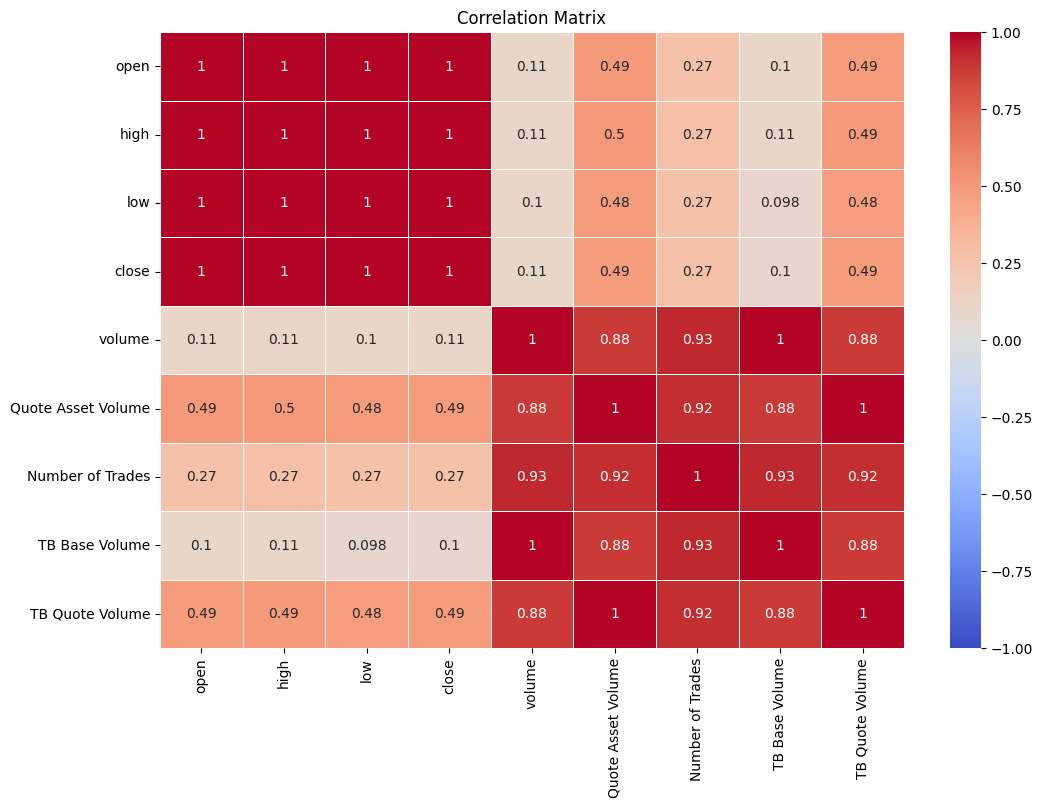

In [25]:
correlations = hist_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlations, annot=True, cmap="coolwarm", vmin=-1, vmax=1, linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

In [26]:
data_csv=hist_df.drop(['Quote Asset Volume','TB Quote Volume','Number of Trades','TB Base Volume','Close Time','Ignore'],axis=1)
data_csv.to_csv('btc_prediction_data.csv')
data_csv

,date,open,high,low,close,volume
0,2017-08-17,4261.48,4485.39,4200.74,4285.08,795.150377
1,2017-08-18,4285.08,4371.52,3938.77,4108.37,1199.888264
2,2017-08-19,4108.37,4184.69,3850.00,4139.98,381.309763
3,2017-08-20,4120.98,4211.08,4032.62,4086.29,467.083022
4,2017-08-21,4069.13,4119.62,3911.79,4016.00,691.743060
...,...,...,...,...,...,...
2101,2023-05-19,26821.28,27183.60,26630.00,26880.26,28754.135440
2102,2023-05-20,26880.26,27150.00,26825.11,27102.43,14434.547180
2103,2023-05-21,27102.42,27277.55,26666.03,26747.78,21347.872790
2104,2023-05-22,26747.78,27099.89,26538.21,26849.27,26458.838280


## Blockchain Data Preparation from Blockchain.com

In [27]:
#THIS WAS FOR TRIAL ONLYYYY!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#url = 'https://api.blockchain.info/charts/hash-rate'
#params = {
#    'timespan': '90days',
#    'format': 'json'
#}

# Make the API request
#response = requests.get(url, params=params)

# Extract the data from the response
#data = response.json()['values']

# Print the data
#for entry in data:
#    print('Date:', entry['x'], 'Price:', entry['y'])

In [28]:

features = [
    "hash-rate",
    "avg-block-size",
    "blockchain-size",
    "blocks-size",
    "cost-per-transaction",
    "cost-per-transaction-percent",
    "difficulty",
    "estimated-transaction-volume",
    "estimated-transaction-volume-usd",
    "hash-rate",
    "n-transactions-total",
    "market-price",
    "n-unique-addresses",
    "n-transactions-per-block",
    "n-transactions",
    "miners-revenue",
    "transaction-fees",
    "transaction-fees-usd",
    "n-transactions-excluding-popular",
    "n-transactions-excluding-chains-longer-than-100",
    "output-volume",
    "total-bitcoins",
    "trade-volume"
]

In [29]:
###this is the one that works 
import warnings

# Ignore FutureWarning messages
warnings.filterwarnings("ignore", category=FutureWarning)
url = 'https://api.blockchain.info/charts'
params = {
    'timespan': '5years',
    'format': 'json'
}

# Define the data to retrieve
data_types = ['hash-rate', 'market-price', 'difficulty' , 'avg-block-size','total-bitcoins','cost-per-transaction',
              'blocks-size', 'miners-revenue','transaction-fees','n-transactions-per-block','n-transactions',
              'cost-per-transaction-percent',"estimated-transaction-volume-usd","market-cap"]
#data_types=features

# Initialize a dictionary to store the dataframes
dfs = {}

# Loop over the data types and retrieve the data
for data_type in data_types:
    # Set the API endpoint for the current data type
    current_url = f"{url}/{data_type}"
    
    # Make the API request
    response = requests.get(current_url, params=params)
    
    # Extract the data from the response
    data = response.json()['values']
    
    # Create an empty dataframe for the current data type
    df = pd.DataFrame(columns=['date', data_type])
    
    # Process the data
    for entry in data:
        # Convert the timestamp to a datetime object
        date = datetime.fromtimestamp(entry['x']).date()
        
        # Add a new row to the DataFrame
        df = df.append({'date': date, data_type: entry['y']}, ignore_index=True)
    
    # Store the DataFrame in the dictionary
    dfs[data_type] = df

# Print the DataFrames
for data_type, df in dfs.items():
    print(f"{data_type}:")
    print(df)
    print("\n")



hash-rate:
            date     hash-rate
0     2018-05-24  3.061625e+07
1     2018-05-25  3.768153e+07
2     2018-05-26  3.468414e+07
3     2018-05-27  3.511234e+07
4     2018-05-28  3.339954e+07
...          ...           ...
1820  2023-05-18  3.447681e+08
1821  2023-05-19  3.694694e+08
1822  2023-05-20  3.226699e+08
1823  2023-05-21  3.719325e+08
1824  2023-05-22  3.546906e+08

[1825 rows x 2 columns]


market-price:
            date  market-price
0     2018-05-24       7511.91
1     2018-05-25       7576.78
2     2018-05-26       7465.12
3     2018-05-27       7334.71
4     2018-05-28       7344.56
...          ...           ...
1821  2023-05-19      26833.27
1822  2023-05-20      26889.60
1823  2023-05-21      27124.48
1824  2023-05-22      26756.57
1825  2023-05-23      26849.97

[1826 rows x 2 columns]


difficulty:
            date    difficulty
0     2018-05-24  4.219142e+12
1     2018-05-25  4.306950e+12
2     2018-05-26  4.306950e+12
3     2018-05-27  4.306950e+12
4     2018

In [30]:
dfs

{'hash-rate':             date     hash-rate
 0     2018-05-24  3.061625e+07
 1     2018-05-25  3.768153e+07
 2     2018-05-26  3.468414e+07
 3     2018-05-27  3.511234e+07
 4     2018-05-28  3.339954e+07
 ...          ...           ...
 1820  2023-05-18  3.447681e+08
 1821  2023-05-19  3.694694e+08
 1822  2023-05-20  3.226699e+08
 1823  2023-05-21  3.719325e+08
 1824  2023-05-22  3.546906e+08
 
 [1825 rows x 2 columns],
 'market-price':             date  market-price
 0     2018-05-24       7511.91
 1     2018-05-25       7576.78
 2     2018-05-26       7465.12
 3     2018-05-27       7334.71
 4     2018-05-28       7344.56
 ...          ...           ...
 1821  2023-05-19      26833.27
 1822  2023-05-20      26889.60
 1823  2023-05-21      27124.48
 1824  2023-05-22      26756.57
 1825  2023-05-23      26849.97
 
 [1826 rows x 2 columns],
 'difficulty':             date    difficulty
 0     2018-05-24  4.219142e+12
 1     2018-05-25  4.306950e+12
 2     2018-05-26  4.306950e+12
 3   

In [31]:
#list of dataframes; each with the blockchain data
frames=[]
for key in dfs.keys():
    name=key.replace('-','')
    name=dfs[key]
    frames.append(name)
frames[4]

,date,total-bitcoins
0,2018-05-24,17051050.00
1,2018-05-25,17053275.00
2,2018-05-26,17055487.50
3,2018-05-27,17057712.50
4,2018-05-28,17059937.50
...,...,...
1497,2023-05-17,19375675.00
1498,2023-05-18,19376781.25
1499,2023-05-19,19377893.75
1500,2023-05-20,19379000.00


In [32]:
# merged_df = pd.merge(hashrate, difficulty, on='date')
# merged_df= pd.merge(merged_df,marketPrice,on='date')
# merged_df.dropna()

In [33]:
dfs.keys()

dict_keys(['hash-rate', 'market-price', 'difficulty', 'avg-block-size', 'total-bitcoins', 'cost-per-transaction', 'blocks-size', 'miners-revenue', 'transaction-fees', 'n-transactions-per-block', 'n-transactions', 'cost-per-transaction-percent', 'estimated-transaction-volume-usd', 'market-cap'])

In [100]:
#MERGE ALL RESULTING DATAFRAMES 
merged_df=frames[0].merge(frames[1],on='date')
print(merged_df)
for i in range(1,len(frames)-1):
    merged_df=merged_df.merge(frames[i+1],on='date')
    print(merged_df)

            date     hash-rate  market-price
0     2018-05-24  3.061625e+07       7511.91
1     2018-05-25  3.768153e+07       7576.78
2     2018-05-26  3.468414e+07       7465.12
3     2018-05-27  3.511234e+07       7334.71
4     2018-05-28  3.339954e+07       7344.56
...          ...           ...           ...
1820  2023-05-18  3.447681e+08      27398.27
1821  2023-05-19  3.694694e+08      26833.27
1822  2023-05-20  3.226699e+08      26889.60
1823  2023-05-21  3.719325e+08      27124.48
1824  2023-05-22  3.546906e+08      26756.57

[1825 rows x 3 columns]
            date     hash-rate  market-price    difficulty
0     2018-05-24  3.061625e+07       7511.91  4.219142e+12
1     2018-05-25  3.768153e+07       7576.78  4.306950e+12
2     2018-05-26  3.468414e+07       7465.12  4.306950e+12
3     2018-05-27  3.511234e+07       7334.71  4.306950e+12
4     2018-05-28  3.339954e+07       7344.56  4.306950e+12
...          ...           ...           ...           ...
1820  2023-05-18  3.44

In [110]:
merged_df.shape

(1501, 15)

In [199]:
whole_df=merged_df.merge(hist_df,on='date')

In [131]:
whole_df

,date,hash-rate,market-price,difficulty,avg-block-size,total-bitcoins,cost-per-transaction,blocks-size,miners-revenue,transaction-fees,...,high,low,close,volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,2018-05-24,3.061625e+07,7511.91,4.219142e+12,0.726173,17051050.00,66.711297,169660.765346,1.387588e+07,29.753628,...,7730.73,7266.99,7575.01,37845.446595,2018-05-24 23:59:59.999000064,2.842864e+08,253694,19012.981252,1.429014e+08,0
1,2018-05-25,3.768153e+07,7576.78,4.306950e+12,0.625062,17053275.00,85.165732,169763.804470,1.670790e+07,30.376963,...,7649.55,7308.15,7457.00,26739.956640,2018-05-25 23:59:59.999000064,1.997496e+08,239025,13830.870235,1.033606e+08,0
2,2018-05-26,3.468414e+07,7465.12,4.306950e+12,0.488469,17055487.50,97.622131,169874.399246,1.550601e+07,22.514081,...,7620.00,7300.00,7333.96,19464.086071,2018-05-26 23:59:59.999000064,1.456362e+08,212344,10377.955643,7.772576e+07,0
3,2018-05-27,3.511234e+07,7334.71,4.306950e+12,0.448727,17057712.50,105.840394,169952.989056,1.531309e+07,19.470892,...,7400.00,7231.11,7338.99,18706.945515,2018-05-27 23:59:59.999000064,1.367106e+08,198341,10258.276953,7.499083e+07,0
4,2018-05-28,3.339954e+07,7344.56,4.306950e+12,0.710101,17059937.50,76.770901,170026.319757,1.454770e+07,29.124010,...,7437.00,7058.02,7099.00,27219.438963,2018-05-28 23:59:59.999000064,1.967890e+08,233392,14409.487810,1.042337e+08,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496,2023-05-17,3.818189e+08,27036.39,4.800553e+13,1.672989,19375675.00,50.645141,481245.144490,2.954911e+07,93.113719,...,27500.00,26544.71,27405.61,42958.977850,2023-05-17 23:59:59.999000064,1.159715e+09,1016823,21634.022120,5.841856e+08,0
1497,2023-05-18,3.447681e+08,27398.27,4.918830e+13,1.642504,19376781.25,56.343204,481512.612035,2.685903e+07,106.900148,...,27485.33,26361.20,26821.28,49198.651430,2023-05-18 23:59:59.999000064,1.330746e+09,1057318,23659.893740,6.401281e+08,0
1498,2023-05-19,3.694694e+08,26833.27,4.954970e+13,1.726898,19377893.75,55.069303,481744.210415,2.873896e+07,116.545962,...,27183.60,26630.00,26880.26,28754.135440,2023-05-19 23:59:59.999000064,7.728648e+08,756295,13622.248120,3.661697e+08,0
1499,2023-05-20,3.226699e+08,26889.60,4.954970e+13,1.709836,19379000.00,57.526244,482003.233714,2.437594e+07,85.192812,...,27150.00,26825.11,27102.43,14434.547180,2023-05-20 23:59:59.999000064,3.892257e+08,481382,6769.943680,1.825629e+08,0


In [111]:
#study the correlation over the past 3 months 
temp_df=merged_df[-90:]

In [112]:
temp_df.head()

,date,hash-rate,market-price,difficulty,avg-block-size,total-bitcoins,cost-per-transaction,blocks-size,miners-revenue,transaction-fees,n-transactions-per-block,n-transactions,cost-per-transaction-percent,estimated-transaction-volume-usd,market-cap
1411,2023-02-04,2.660359e+08,23440.09,3.935094e+13,1.758864,19281362.50,66.851246,452136.739806,2.035587e+07,20.355689,2238.933824,304495.0,1.292725,1.574648e+09,4.511260e+11
1412,2023-02-05,2.973342e+08,23328.24,3.935094e+13,1.629097,19282468.75,88.103536,452376.824419,2.238825e+07,13.976726,1671.796053,254113.0,2.507023,8.930215e+08,4.405273e+11
1413,2023-02-07,2.777727e+08,22763.74,3.935094e+13,2.142793,19283575.00,70.197996,452950.051340,2.120436e+07,22.202102,2115.697183,300429.0,1.037410,2.043971e+09,4.406490e+11
1414,2023-02-08,2.699481e+08,23254.79,3.935094e+13,2.108702,19284687.50,64.208306,453254.267213,2.035166e+07,18.393597,2296.833333,316963.0,1.005908,2.023213e+09,4.474048e+11
1415,2023-02-09,3.168956e+08,22964.87,3.935094e+13,2.143937,19285793.75,63.145798,453545.342372,2.333231e+07,21.551065,2280.858025,369499.0,0.889144,2.624133e+09,4.373825e+11


In [184]:
# features = [
#     "market-price",
#     "difficulty"
# ]

In [185]:
# def fetch_data(feature):
#     url = f"https://api.blockchain.info/charts/market-price?timespan=3months&format=json"
#     response = requests.get(url)
    
#     if response.status_code == 200:
#         data = response.json()
#         return data["values"]
#     else:
#         print(f"Error fetching {feature}: {response.status_code}")
#         return []

In [186]:
# dataframes = []
# for feature in features:
#     data = fetch_data(feature)
    
#     if data:
#         df = pd.DataFrame(data)
#         df["feature"] = feature
#         dataframes.append(df)

# blockchainData_df = pd.concat(dataframes, ignore_index=True)
# blockchainData_df.rename(columns={"x": "timestamp", "y": "value"}, inplace=True)

# print(blockchainData_df)

In [187]:
# blockchainData_df["timestamp"] = pd.to_datetime(blockchainData_df["timestamp"], unit="s")
# blockchainData_df

In [188]:
# blockchainData_df.info()

In [189]:
# blockchainData_df.feature.unique()

In [190]:
# blockchainData_df.set_index('timestamp')

In [191]:
# pivoted_df = blockchainData_df.pivot_table(index="timestamp", columns="feature", values="value")

In [192]:
# pivoted_df

In [193]:
# pivoted_df.info()

In [194]:
# pivoted_df.describe()

In [195]:
# num_years = (blockchainData_df["timestamp"].max() - blockchainData_df["timestamp"].min()).total_seconds() / (365.25 * 24 * 60 * 60)
# # num_years 

## Merging the Data to study correlations 

In [196]:
# mergedData_df = pd.merge(hist_df, pivoted_df, left_index=True, right_index=True)
# mergedData_df                     

In [113]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 1411 to 1500
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   date                              90 non-null     object 
 1   hash-rate                         90 non-null     float64
 2   market-price                      90 non-null     float64
 3   difficulty                        90 non-null     float64
 4   avg-block-size                    90 non-null     float64
 5   total-bitcoins                    90 non-null     float64
 6   cost-per-transaction              90 non-null     float64
 7   blocks-size                       90 non-null     float64
 8   miners-revenue                    90 non-null     float64
 9   transaction-fees                  90 non-null     float64
 10  n-transactions-per-block          90 non-null     float64
 11  n-transactions                    90 non-null     float64
 12  cost-

In [114]:
#hist_df.drop('Close Time',axis=1,inplace=True)

In [115]:
t1=hist_df.set_index('date')
t1.head()
type(hist_df['date'][0])

datetime.date

In [117]:
#you must merge based on the date; normal index will lead to false results because of how you took a sample of the data
t2=temp_df.set_index('date')
t2.head()
type(temp_df['date'])

pandas.core.series.Series

In [118]:
mergedData_df=t1.merge(t2,on='date')

In [119]:
mergedData_df

,open,high,low,close,volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,...,total-bitcoins,cost-per-transaction,blocks-size,miners-revenue,transaction-fees,n-transactions-per-block,n-transactions,cost-per-transaction-percent,estimated-transaction-volume-usd,market-cap
date,,,,,,,,,,,,,,,,,,,,,
2023-02-04,23431.90,23587.78,23253.96,23326.84,166126.47295,2023-02-04 23:59:59.999000064,3.886778e+09,4852404,81863.93145,1.915443e+09,...,19281362.50,66.851246,452136.739806,2.035587e+07,20.355689,2238.933824,304495.0,1.292725,1.574648e+09,4.511260e+11
2023-02-05,23327.66,23433.33,22743.00,22932.91,209251.33917,2023-02-05 23:59:59.999000064,4.842463e+09,5903916,103885.22312,2.404287e+09,...,19282468.75,88.103536,452376.824419,2.238825e+07,13.976726,1671.796053,254113.0,2.507023,8.930215e+08,4.405273e+11
2023-02-07,22762.52,23350.25,22745.78,23240.46,308006.72482,2023-02-07 23:59:59.999000064,7.085929e+09,8293878,154613.24744,3.557210e+09,...,19283575.00,70.197996,452950.051340,2.120436e+07,22.202102,2115.697183,300429.0,1.037410,2.043971e+09,4.406490e+11
2023-02-08,23242.42,23452.00,22665.85,22963.00,280056.30717,2023-02-08 23:59:59.999000064,6.457586e+09,7896433,138627.72636,3.196784e+09,...,19284687.50,64.208306,453254.267213,2.035166e+07,18.393597,2296.833333,316963.0,1.005908,2.023213e+09,4.474048e+11
2023-02-09,22961.85,23011.39,21688.00,21796.35,402894.69550,2023-02-09 23:59:59.999000064,9.052973e+09,9784291,199309.68374,4.478800e+09,...,19285793.75,63.145798,453545.342372,2.333231e+07,21.551065,2280.858025,369499.0,0.889144,2.624133e+09,4.373825e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-17,27033.85,27500.00,26544.71,27405.61,42958.97785,2023-05-17 23:59:59.999000064,1.159715e+09,1016823,21634.02212,5.841856e+08,...,19375675.00,50.645141,481245.144490,2.954911e+07,93.113719,3646.587500,583454.0,1.198274,2.465972e+09,5.253327e+11
2023-05-18,27405.62,27485.33,26361.20,26821.28,49198.65143,2023-05-18 23:59:59.999000064,1.330746e+09,1057318,23659.89374,6.401281e+08,...,19376781.25,56.343204,481512.612035,2.685903e+07,106.900148,3380.879433,476704.0,1.068942,2.512673e+09,5.273197e+11
2023-05-19,26821.28,27183.60,26630.00,26880.26,28754.13544,2023-05-19 23:59:59.999000064,7.728648e+08,756295,13622.24812,3.661697e+08,...,19377893.75,55.069303,481744.210415,2.873896e+07,116.545962,3436.493333,515474.0,1.124987,2.554605e+09,5.222342e+11


In [120]:
mergedData_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90 entries, 2023-02-04 to 2023-05-22
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   open                              90 non-null     float64       
 1   high                              90 non-null     float64       
 2   low                               90 non-null     float64       
 3   close                             90 non-null     float64       
 4   volume                            90 non-null     float64       
 5   Close Time                        90 non-null     datetime64[ns]
 6   Quote Asset Volume                90 non-null     float64       
 7   Number of Trades                  90 non-null     int64         
 8   TB Base Volume                    90 non-null     float64       
 9   TB Quote Volume                   90 non-null     float64       
 10  Ignore                            90 non

In [121]:
mergedData_df.dropna(inplace=True)

In [122]:
mergedData_df.drop('Close Time',axis=1,inplace=True)

In [185]:
mergedData_df['close_nextday']=mergedData_df.close.shift(-1)

In [186]:
mergedData_df

,open,high,low,close,volume,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,hash-rate,...,cost-per-transaction,blocks-size,miners-revenue,transaction-fees,n-transactions-per-block,n-transactions,cost-per-transaction-percent,estimated-transaction-volume-usd,market-cap,close_nextday
date,,,,,,,,,,,,,,,,,,,,,
2023-02-04,23431.90,23587.78,23253.96,23326.84,166126.47295,3.886778e+09,4852404,81863.93145,1.915443e+09,2.660359e+08,...,66.851246,452136.739806,2.035587e+07,20.355689,2238.933824,304495.0,1.292725,1.574648e+09,4.511260e+11,22932.91
2023-02-05,23327.66,23433.33,22743.00,22932.91,209251.33917,4.842463e+09,5903916,103885.22312,2.404287e+09,2.973342e+08,...,88.103536,452376.824419,2.238825e+07,13.976726,1671.796053,254113.0,2.507023,8.930215e+08,4.405273e+11,23240.46
2023-02-07,22762.52,23350.25,22745.78,23240.46,308006.72482,7.085929e+09,8293878,154613.24744,3.557210e+09,2.777727e+08,...,70.197996,452950.051340,2.120436e+07,22.202102,2115.697183,300429.0,1.037410,2.043971e+09,4.406490e+11,22963.00
2023-02-08,23242.42,23452.00,22665.85,22963.00,280056.30717,6.457586e+09,7896433,138627.72636,3.196784e+09,2.699481e+08,...,64.208306,453254.267213,2.035166e+07,18.393597,2296.833333,316963.0,1.005908,2.023213e+09,4.474048e+11,21796.35
2023-02-09,22961.85,23011.39,21688.00,21796.35,402894.69550,9.052973e+09,9784291,199309.68374,4.478800e+09,3.168956e+08,...,63.145798,453545.342372,2.333231e+07,21.551065,2280.858025,369499.0,0.889144,2.624133e+09,4.373825e+11,21625.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-17,27033.85,27500.00,26544.71,27405.61,42958.97785,1.159715e+09,1016823,21634.02212,5.841856e+08,3.818189e+08,...,50.645141,481245.144490,2.954911e+07,93.113719,3646.587500,583454.0,1.198274,2.465972e+09,5.253327e+11,26821.28
2023-05-18,27405.62,27485.33,26361.20,26821.28,49198.65143,1.330746e+09,1057318,23659.89374,6.401281e+08,3.447681e+08,...,56.343204,481512.612035,2.685903e+07,106.900148,3380.879433,476704.0,1.068942,2.512673e+09,5.273197e+11,26880.26
2023-05-19,26821.28,27183.60,26630.00,26880.26,28754.13544,7.728648e+08,756295,13622.24812,3.661697e+08,3.694694e+08,...,55.069303,481744.210415,2.873896e+07,116.545962,3436.493333,515474.0,1.124987,2.554605e+09,5.222342e+11,27102.43


In [187]:
mergedData_df.dropna(inplace=True)
mergedData_df

,open,high,low,close,volume,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,hash-rate,...,cost-per-transaction,blocks-size,miners-revenue,transaction-fees,n-transactions-per-block,n-transactions,cost-per-transaction-percent,estimated-transaction-volume-usd,market-cap,close_nextday
date,,,,,,,,,,,,,,,,,,,,,
2023-02-04,23431.90,23587.78,23253.96,23326.84,166126.47295,3.886778e+09,4852404,81863.93145,1.915443e+09,2.660359e+08,...,66.851246,452136.739806,2.035587e+07,20.355689,2238.933824,304495.0,1.292725,1.574648e+09,4.511260e+11,22932.91
2023-02-05,23327.66,23433.33,22743.00,22932.91,209251.33917,4.842463e+09,5903916,103885.22312,2.404287e+09,2.973342e+08,...,88.103536,452376.824419,2.238825e+07,13.976726,1671.796053,254113.0,2.507023,8.930215e+08,4.405273e+11,23240.46
2023-02-07,22762.52,23350.25,22745.78,23240.46,308006.72482,7.085929e+09,8293878,154613.24744,3.557210e+09,2.777727e+08,...,70.197996,452950.051340,2.120436e+07,22.202102,2115.697183,300429.0,1.037410,2.043971e+09,4.406490e+11,22963.00
2023-02-08,23242.42,23452.00,22665.85,22963.00,280056.30717,6.457586e+09,7896433,138627.72636,3.196784e+09,2.699481e+08,...,64.208306,453254.267213,2.035166e+07,18.393597,2296.833333,316963.0,1.005908,2.023213e+09,4.474048e+11,21796.35
2023-02-09,22961.85,23011.39,21688.00,21796.35,402894.69550,9.052973e+09,9784291,199309.68374,4.478800e+09,3.168956e+08,...,63.145798,453545.342372,2.333231e+07,21.551065,2280.858025,369499.0,0.889144,2.624133e+09,4.373825e+11,21625.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-16,27162.15,27296.89,26852.11,27033.84,33270.45451,9.002734e+08,815642,15970.99932,4.322144e+08,3.651143e+08,...,50.714094,480982.773739,3.010135e+07,113.010845,3702.366013,566462.0,1.000435,3.008826e+09,5.291773e+11,27405.61
2023-05-17,27033.85,27500.00,26544.71,27405.61,42958.97785,1.159715e+09,1016823,21634.02212,5.841856e+08,3.818189e+08,...,50.645141,481245.144490,2.954911e+07,93.113719,3646.587500,583454.0,1.198274,2.465972e+09,5.253327e+11,26821.28
2023-05-18,27405.62,27485.33,26361.20,26821.28,49198.65143,1.330746e+09,1057318,23659.89374,6.401281e+08,3.447681e+08,...,56.343204,481512.612035,2.685903e+07,106.900148,3380.879433,476704.0,1.068942,2.512673e+09,5.273197e+11,26880.26


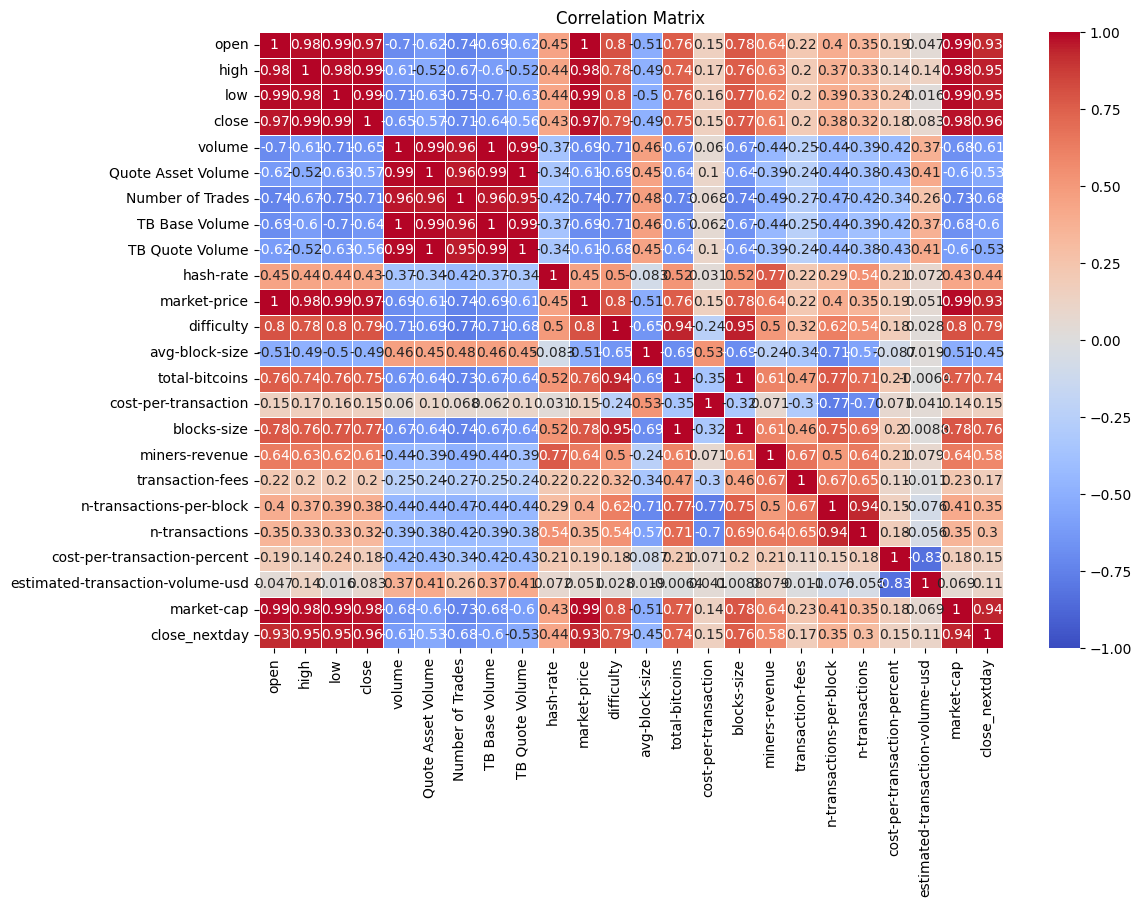

In [188]:
correlations = mergedData_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlations, annot=True, cmap="coolwarm", vmin=-1, vmax=1, linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

In [189]:
corr=correlations['close_nextday']
corr

open                                0.929397
high                                0.950939
low                                 0.945920
close                               0.961869
volume                             -0.609756
Quote Asset Volume                 -0.534782
Number of Trades                   -0.679313
TB Base Volume                     -0.604147
TB Quote Volume                    -0.529026
hash-rate                           0.435626
market-price                        0.930956
difficulty                          0.787865
avg-block-size                     -0.452183
total-bitcoins                      0.740630
cost-per-transaction                0.151921
blocks-size                         0.759031
miners-revenue                      0.580618
transaction-fees                    0.174069
n-transactions-per-block            0.352404
n-transactions                      0.299051
cost-per-transaction-percent        0.146816
estimated-transaction-volume-usd    0.111303
market-cap

In [190]:
absolute_s = corr.apply(lambda x: abs(x))
absolute_s

open                                0.929397
high                                0.950939
low                                 0.945920
close                               0.961869
volume                              0.609756
Quote Asset Volume                  0.534782
Number of Trades                    0.679313
TB Base Volume                      0.604147
TB Quote Volume                     0.529026
hash-rate                           0.435626
market-price                        0.930956
difficulty                          0.787865
avg-block-size                      0.452183
total-bitcoins                      0.740630
cost-per-transaction                0.151921
blocks-size                         0.759031
miners-revenue                      0.580618
transaction-fees                    0.174069
n-transactions-per-block            0.352404
n-transactions                      0.299051
cost-per-transaction-percent        0.146816
estimated-transaction-volume-usd    0.111303
market-cap

In [191]:
absolute_s.sort_values()

estimated-transaction-volume-usd    0.111303
cost-per-transaction-percent        0.146816
cost-per-transaction                0.151921
transaction-fees                    0.174069
n-transactions                      0.299051
n-transactions-per-block            0.352404
hash-rate                           0.435626
avg-block-size                      0.452183
TB Quote Volume                     0.529026
Quote Asset Volume                  0.534782
miners-revenue                      0.580618
TB Base Volume                      0.604147
volume                              0.609756
Number of Trades                    0.679313
total-bitcoins                      0.740630
blocks-size                         0.759031
difficulty                          0.787865
open                                0.929397
market-price                        0.930956
market-cap                          0.938449
low                                 0.945920
high                                0.950939
close     

In [197]:
temp=absolute_s[absolute_s<0.60].index
temp

Index(['Quote Asset Volume', 'TB Quote Volume', 'hash-rate', 'avg-block-size',
       'cost-per-transaction', 'miners-revenue', 'transaction-fees',
       'n-transactions-per-block', 'n-transactions',
       'cost-per-transaction-percent', 'estimated-transaction-volume-usd'],
      dtype='object')

In [200]:
whole_df.drop(temp,axis=1,inplace=True)

In [201]:
whole_df

,date,market-price,difficulty,total-bitcoins,blocks-size,market-cap,open,high,low,close,volume,Close Time,Number of Trades,TB Base Volume,Ignore
0,2018-05-24,7511.91,4.219142e+12,17051050.00,169660.765346,1.285734e+11,7501.95,7730.73,7266.99,7575.01,37845.446595,2018-05-24 23:59:59.999000064,253694,19012.981252,0
1,2018-05-25,7576.78,4.306950e+12,17053275.00,169763.804470,1.294088e+11,7578.99,7649.55,7308.15,7457.00,26739.956640,2018-05-25 23:59:59.999000064,239025,13830.870235,0
2,2018-05-26,7465.12,4.306950e+12,17055487.50,169874.399246,1.263044e+11,7456.99,7620.00,7300.00,7333.96,19464.086071,2018-05-26 23:59:59.999000064,212344,10377.955643,0
3,2018-05-27,7334.71,4.306950e+12,17057712.50,169952.989056,1.245513e+11,7334.00,7400.00,7231.11,7338.99,18706.945515,2018-05-27 23:59:59.999000064,198341,10258.276953,0
4,2018-05-28,7344.56,4.306950e+12,17059937.50,170026.319757,1.234969e+11,7338.99,7437.00,7058.02,7099.00,27219.438963,2018-05-28 23:59:59.999000064,233392,14409.487810,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496,2023-05-17,27036.39,4.800553e+13,19375675.00,481245.144490,5.253327e+11,27033.85,27500.00,26544.71,27405.61,42958.977850,2023-05-17 23:59:59.999000064,1016823,21634.022120,0
1497,2023-05-18,27398.27,4.918830e+13,19376781.25,481512.612035,5.273197e+11,27405.62,27485.33,26361.20,26821.28,49198.651430,2023-05-18 23:59:59.999000064,1057318,23659.893740,0
1498,2023-05-19,26833.27,4.954970e+13,19377893.75,481744.210415,5.222342e+11,26821.28,27183.60,26630.00,26880.26,28754.135440,2023-05-19 23:59:59.999000064,756295,13622.248120,0
1499,2023-05-20,26889.60,4.954970e+13,19379000.00,482003.233714,5.244539e+11,26880.26,27150.00,26825.11,27102.43,14434.547180,2023-05-20 23:59:59.999000064,481382,6769.943680,0


In [203]:
whole_df.drop(['Close Time','Ignore'],axis=1,inplace=True)

In [204]:
whole_df.columns

Index(['date', 'market-price', 'difficulty', 'total-bitcoins', 'blocks-size',
       'market-cap', 'open', 'high', 'low', 'close', 'volume',
       'Number of Trades', 'TB Base Volume'],
      dtype='object')

In [205]:
whole_df

,date,market-price,difficulty,total-bitcoins,blocks-size,market-cap,open,high,low,close,volume,Number of Trades,TB Base Volume
0,2018-05-24,7511.91,4.219142e+12,17051050.00,169660.765346,1.285734e+11,7501.95,7730.73,7266.99,7575.01,37845.446595,253694,19012.981252
1,2018-05-25,7576.78,4.306950e+12,17053275.00,169763.804470,1.294088e+11,7578.99,7649.55,7308.15,7457.00,26739.956640,239025,13830.870235
2,2018-05-26,7465.12,4.306950e+12,17055487.50,169874.399246,1.263044e+11,7456.99,7620.00,7300.00,7333.96,19464.086071,212344,10377.955643
3,2018-05-27,7334.71,4.306950e+12,17057712.50,169952.989056,1.245513e+11,7334.00,7400.00,7231.11,7338.99,18706.945515,198341,10258.276953
4,2018-05-28,7344.56,4.306950e+12,17059937.50,170026.319757,1.234969e+11,7338.99,7437.00,7058.02,7099.00,27219.438963,233392,14409.487810
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496,2023-05-17,27036.39,4.800553e+13,19375675.00,481245.144490,5.253327e+11,27033.85,27500.00,26544.71,27405.61,42958.977850,1016823,21634.022120
1497,2023-05-18,27398.27,4.918830e+13,19376781.25,481512.612035,5.273197e+11,27405.62,27485.33,26361.20,26821.28,49198.651430,1057318,23659.893740
1498,2023-05-19,26833.27,4.954970e+13,19377893.75,481744.210415,5.222342e+11,26821.28,27183.60,26630.00,26880.26,28754.135440,756295,13622.248120
1499,2023-05-20,26889.60,4.954970e+13,19379000.00,482003.233714,5.244539e+11,26880.26,27150.00,26825.11,27102.43,14434.547180,481382,6769.943680


In [206]:
whole_df['close_nextday']=whole_df.close.shift(-1)

In [207]:
whole_df

,date,market-price,difficulty,total-bitcoins,blocks-size,market-cap,open,high,low,close,volume,Number of Trades,TB Base Volume,close_nextday
0,2018-05-24,7511.91,4.219142e+12,17051050.00,169660.765346,1.285734e+11,7501.95,7730.73,7266.99,7575.01,37845.446595,253694,19012.981252,7457.00
1,2018-05-25,7576.78,4.306950e+12,17053275.00,169763.804470,1.294088e+11,7578.99,7649.55,7308.15,7457.00,26739.956640,239025,13830.870235,7333.96
2,2018-05-26,7465.12,4.306950e+12,17055487.50,169874.399246,1.263044e+11,7456.99,7620.00,7300.00,7333.96,19464.086071,212344,10377.955643,7338.99
3,2018-05-27,7334.71,4.306950e+12,17057712.50,169952.989056,1.245513e+11,7334.00,7400.00,7231.11,7338.99,18706.945515,198341,10258.276953,7099.00
4,2018-05-28,7344.56,4.306950e+12,17059937.50,170026.319757,1.234969e+11,7338.99,7437.00,7058.02,7099.00,27219.438963,233392,14409.487810,7461.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496,2023-05-17,27036.39,4.800553e+13,19375675.00,481245.144490,5.253327e+11,27033.85,27500.00,26544.71,27405.61,42958.977850,1016823,21634.022120,26821.28
1497,2023-05-18,27398.27,4.918830e+13,19376781.25,481512.612035,5.273197e+11,27405.62,27485.33,26361.20,26821.28,49198.651430,1057318,23659.893740,26880.26
1498,2023-05-19,26833.27,4.954970e+13,19377893.75,481744.210415,5.222342e+11,26821.28,27183.60,26630.00,26880.26,28754.135440,756295,13622.248120,27102.43
1499,2023-05-20,26889.60,4.954970e+13,19379000.00,482003.233714,5.244539e+11,26880.26,27150.00,26825.11,27102.43,14434.547180,481382,6769.943680,26849.27


In [208]:
whole_df.isnull().sum()

date                0
market-price        0
difficulty          0
total-bitcoins      0
blocks-size         0
market-cap          0
open                0
high                0
low                 0
close               0
volume              0
Number of Trades    0
TB Base Volume      0
close_nextday       1
dtype: int64

In [209]:
whole_df.dropna(inplace=True)

In [210]:
whole_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              1500 non-null   object 
 1   market-price      1500 non-null   float64
 2   difficulty        1500 non-null   float64
 3   total-bitcoins    1500 non-null   float64
 4   blocks-size       1500 non-null   float64
 5   market-cap        1500 non-null   float64
 6   open              1500 non-null   float64
 7   high              1500 non-null   float64
 8   low               1500 non-null   float64
 9   close             1500 non-null   float64
 10  volume            1500 non-null   float64
 11  Number of Trades  1500 non-null   int64  
 12  TB Base Volume    1500 non-null   float64
 13  close_nextday     1500 non-null   float64
dtypes: float64(12), int64(1), object(1)
memory usage: 175.8+ KB


In [211]:
whole_df

,date,market-price,difficulty,total-bitcoins,blocks-size,market-cap,open,high,low,close,volume,Number of Trades,TB Base Volume,close_nextday
0,2018-05-24,7511.91,4.219142e+12,17051050.00,169660.765346,1.285734e+11,7501.95,7730.73,7266.99,7575.01,37845.446595,253694,19012.981252,7457.00
1,2018-05-25,7576.78,4.306950e+12,17053275.00,169763.804470,1.294088e+11,7578.99,7649.55,7308.15,7457.00,26739.956640,239025,13830.870235,7333.96
2,2018-05-26,7465.12,4.306950e+12,17055487.50,169874.399246,1.263044e+11,7456.99,7620.00,7300.00,7333.96,19464.086071,212344,10377.955643,7338.99
3,2018-05-27,7334.71,4.306950e+12,17057712.50,169952.989056,1.245513e+11,7334.00,7400.00,7231.11,7338.99,18706.945515,198341,10258.276953,7099.00
4,2018-05-28,7344.56,4.306950e+12,17059937.50,170026.319757,1.234969e+11,7338.99,7437.00,7058.02,7099.00,27219.438963,233392,14409.487810,7461.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,2023-05-16,27191.97,4.800553e+13,19374556.25,480982.773739,5.291773e+11,27162.15,27296.89,26852.11,27033.84,33270.454510,815642,15970.999320,27405.61
1496,2023-05-17,27036.39,4.800553e+13,19375675.00,481245.144490,5.253327e+11,27033.85,27500.00,26544.71,27405.61,42958.977850,1016823,21634.022120,26821.28
1497,2023-05-18,27398.27,4.918830e+13,19376781.25,481512.612035,5.273197e+11,27405.62,27485.33,26361.20,26821.28,49198.651430,1057318,23659.893740,26880.26
1498,2023-05-19,26833.27,4.954970e+13,19377893.75,481744.210415,5.222342e+11,26821.28,27183.60,26630.00,26880.26,28754.135440,756295,13622.248120,27102.43


In [212]:
csv_file=whole_df.to_csv('whole_data_for_ML_BTC.csv')
csv_file